<div align="center">

  # <span style="color:black;">**PERANCANGAN APLIKASI SAINS DATA**</span>
  #### <span style="color:black;">BELUM KEPIKIRAN JUDUL</span>

---

</div>

**Catatan analisis yang dibuat oleh:**

1. Himam Bashiran (NIM: 2311110055)
2. Leonardus Ananto Widodo (NIM: 2311110058)
3. Shafa Syahida (NIM: 2311110050)
4. Donna Nur Tamara (NIM: 2311110014)
5. Brian Nugraha Wiyono (NIM: 2311110052)

  # <b><font color='black'>Palmer Penguin Analysis</font></b>
---

- Task : Classification
- Objective : Prediksi Klasifikasi Spesies Penguin

   # <b><font color='black'>Importing All Necessary Libraries</font></b>
---

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

   # <b><font color='black'>Data Collection</font></b>
---
Dataset Palmer Penguin dapat diakses dari website kaggle [Palmer Penguins Dataset](https://www.kaggle.com/datasets/ashkhagan/palmer-penguins-datasetalternative-iris-dataset/data)

In [12]:
df = pd.read_csv("/kaggle/input/palmer-penguins-datasetalternative-iris-dataset/penguins.csv")

   # <b><font color='black'>Exploratory Data Analysis (EDA)</font></b>
---
Exploratory Data Analysis (EDA) adalah proses awal dalam analisis data yang bertujuan untuk memahami karakteristik dataset sebelum melakukan pemodelan atau pengambilan keputusan. 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [14]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [15]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

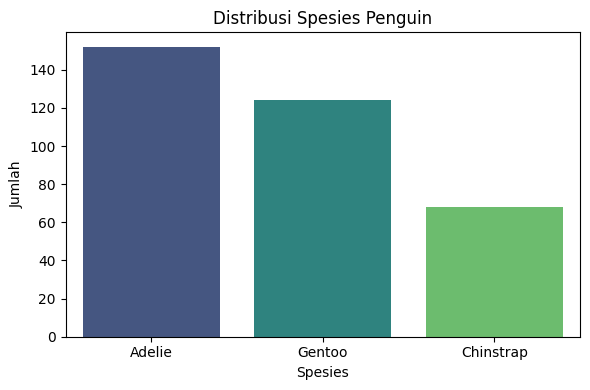

In [16]:
# Visualisasi distribusi target (species)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='species', palette='viridis')
plt.title('Distribusi Spesies Penguin')
plt.xlabel('Spesies')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

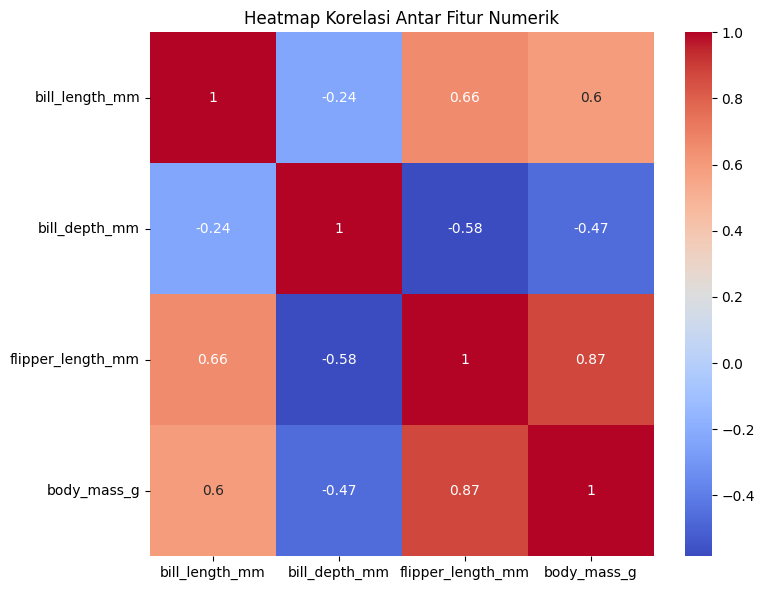

In [17]:
# Korelasi fitur numerik
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.tight_layout()
plt.show()

   # <b><font color='black'>Data pre-processing</font></b>
---
Serangkaian langkah atau teknik yang dilakukan untuk mempersiapkan data mentah menjadi data yang siap digunakan dalam analisis data dan pemodelan.

In [20]:
# Menghapus baris dengan nilai NaN
df_cleaned = df.dropna()

In [22]:
# Encode fitur kategorikal (island dan sex)
le_island = LabelEncoder()
le_sex = LabelEncoder()
le_species = LabelEncoder()

df_cleaned['island'] = le_island.fit_transform(df_cleaned['island'])
df_cleaned['sex'] = le_sex.fit_transform(df_cleaned['sex'])
df_cleaned['species_encoded'] = le_species.fit_transform(df_cleaned['species'])

/tmp/ipykernel_31/2500548804.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['island'] = le_island.fit_transform(df_cleaned['island'])
/tmp/ipykernel_31/2500548804.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sex'] = le_sex.fit_transform(df_cleaned['sex'])
/tmp/ipykernel_31/2500548804.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [23]:
# Pisahkan fitur dan target
X = df_cleaned[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = df_cleaned['species_encoded']

In [ ]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df_cleaned.head()

  # <b><font color='black'>Training Machine Learning</font></b>
---
* Choose Best Score Model
* Kita harus mengalahkan benchmark/baseline

  # <b><font color='black'>Benchmark / Baseline</font></b>
---
- Baseline untuk evaluasi nanti
- Karena ini adalah kasus klasifikasi, baseline bisa diambil dari proporsi kelas target (spesies penguin) yang paling dominan.
- Dengan kata lain, kita bisa membuat tebakan sederhana bahwa semua penguin termasuk dalam spesies yang paling banyak muncul (misalnya, Adelie) tanpa menggunakan pemodelan apa pun.

In [ ]:
# Menentukan kelas mayoritas
most_common_class = Counter(y_train).most_common(1)[0][0]

In [ ]:
# Baseline accuracy (semua tebakan ke kelas mayoritas)
baseline_accuracy = (y_test == most_common_class).mean()
print("Baseline (tebakan semua ke kelas terbanyak):", baseline_accuracy)

  # <b><font color='black'>Machine Learning Klasik</font></b>
---
Beberapa model yang kami gunakan: (apa aja sebutin)

In [ ]:
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2)**2))

def predict_knn(X_train, y_train, X_test, k=3):
    predictions = []
    for test_row in X_test.values:
        distances = [euclidean_distance(test_row, train_row) for train_row in X_train.values]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train.iloc[k_indices]
        predictions.append(Counter(k_nearest_labels).most_common(1)[0][0])
    return predictions

# Prediksi
y_pred_knn = predict_knn(X_train, y_train, X_test, k=5)

In [ ]:
class GaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}
        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean()
            self.var[c] = X_c.var()
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        predictions = []
        for _, x in X.iterrows():
            posteriors = []
            for c in self.classes:
                prior = np.log(self.priors[c])
                class_conditional = -0.5 * np.sum(np.log(2 * np.pi * self.var[c])) - \
                                    0.5 * np.sum(((x - self.mean[c]) ** 2) / self.var[c])
                posterior = prior + class_conditional
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])
        return predictions

# Melatih dan prediksi
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)

  # <b><font color='black'>Evaluation</font></b>
---
Evaluation digunakan untuk mengukur kinerja model pada dataset uji (test set).

In [ ]:
# Evaluasi KNN
print("=== Evaluation: KNN ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Evaluasi Naive Bayes
print("\n=== Evaluation: Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

  # <b><font color='black'>Simpan Model</font></b>
---
Untuk memastikan reproduktifitas, kami menyimpan model ke dalam file .pkl dengan menggunakan library pickle dari Python.

In [ ]:
# Simpan model Naive Bayes ke file .pkl
with open('model_naive_bayes.pkl', 'wb') as file:
    pickle.dump(gnb, file)

# Simpan LabelEncoder target
with open('label_encoder_species.pkl', 'wb') as file:
    pickle.dump(le_species, file)